In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-06-11 08:36:11.275634: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 08:36:11.276702: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 08:36:11.281717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 08:36:11.294038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749611171.312149    7171 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749611171.31

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

num_classes = 10
y_train_full_cat = to_categorical(y_train_full, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_cat, test_size=0.1, random_state=42
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print("Class distribution in training set:")
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} samples")

Training set shape: (54000, 28, 28)
Validation set shape: (6000, 28, 28)
Test set shape: (10000, 28, 28)
Class distribution in training set:
Class 0: 5403 samples
Class 1: 5392 samples
Class 2: 5389 samples
Class 3: 5413 samples
Class 4: 5373 samples
Class 5: 5379 samples
Class 6: 5381 samples
Class 7: 5450 samples
Class 8: 5410 samples
Class 9: 5410 samples


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

/home/rajveer/Code/Workmates/Assessments/Assessment 5/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-11 08:36:22.382791: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_cnn, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val_cnn, y_val)
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6544 - loss: 0.9727 - val_accuracy: 0.8517 - val_loss: 0.4007
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8373 - loss: 0.4453 - val_accuracy: 0.8733 - val_loss: 0.3421
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8652 - loss: 0.3846 - val_accuracy: 0.8845 - val_loss: 0.3094
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8734 - loss: 0.3486 - val_accuracy: 0.8955 - val_loss: 0.2867
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8848 - loss: 0.3217 - val_accuracy: 0.8988 - val_loss: 0.2712
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8883 - loss: 0.3018 - val_accuracy: 0.9013 - val_loss: 0.2685
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8970 - loss: 0.2818 - val_accuracy: 0.9032 - val_loss: 0.2616
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9064 - loss: 0.2632 - val_accu

313/313 - 1s - 3ms/step - accuracy: 0.8977 - loss: 0.2869
Test accuracy: 0.8977
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


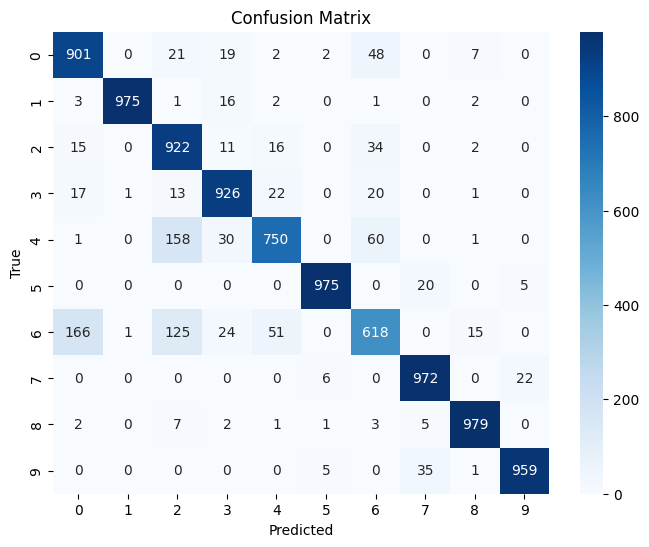

In [6]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_cat, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
model.save('fashion_mnist_cnn.h5')